## Capstone project: Manually tuning an ESC cell model
Welcome to the capstone project! To complete this assignment, follow the instructions below. When you have completed your modifications to the sample code that I have provided as a starting point, click on the <b>"Submit Assignment"</b> button to submit your code to the grader.

### Concept
This Jupyter notebook operates in the same way as all of the other Jupyter notebooks that you have used so far in this specialization. You can type Octave code into notebook cells and execute that code to see how it functions. This allows you to test your code fully before submitting it for grading.

Only one notebook cell is actually graded – the one marked with <code>"% GRADED FUNCTION"</code> in its first line. Do not modify that line – otherwise the grader will not be able to find the correct function for grading.

### Deliverables
The goal of the capstone project is to hand-tune the resistor and capacitor value(s) for a simplified ESC model of a battery cell. To reduce project complexity, this model will not consider hysteresis terms. You will do this tuning by trial-and-error to get the best result you are able to find. Some of the guidelines that you learned in the course will be helpful to you.

When optimizing a model for a real application, the model's parameter values are tuned so that the model gives good and robust predictions over a wide variety of operating conditions. However, for this project you will tune the model to make good predictions for only a single set of input/output (current/voltage) data (otherwise, the project would take too long to complete).

The data that you will be working with were collected from an actual cell in the laboratory. At the beginning of the test, the cell was resting at a high state of charge. The test rested for 5 minutes and then a constant-current discharge pulse was applied for 15 minutes. The cell was then allowed to rest for one hour. Voltage and current were measured every second.

Your deliverable will be a set of resistor and capacitor value(s) within the <code>tuneModel</code> function, below.

## Implementation of the cell simulator
This remainder of this notebook implements a cell simulator using the resistor and capacitor value(s) that you provide. It is similar to <code>simCell.m</code>, which you have seen before, except that it deletes hysteresis states. 

In [1]:
% First, make sure that the ESC toolbox functions are in the path
addpath readonly

The following code provides the tuning values for the model resistor(s) (and capacitor(s), if present). You will tune the model by changing the value of <code>rcValues</code> in this function. 

Every time you make a change to these tuning variables, make sure that you type < shift >< enter > in this code, and then also press < shift >< enter > in the "wrapper code", below, that executes the simulation algorithm.

The simulator is able to work with Rint or Thévenin type models. Remember that an Rint model looks like: 
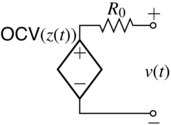
To use this kind of model, you need to provide only a value for $R_0$, which you do by setting <code>rcValues</code> equal to $R_0$ in milliohms. 

Also remember that a standard Thévenin model looks like:
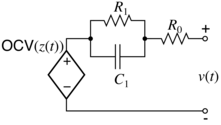
To use this kind of model, you need to provide values for $R_0$, $R_1$, and $C_1$, which you do by setting <code>rcValues</code> to a vector of three values. The first value is $R_0$ in milliohms; the second value is $R_1$ in milliohms; and the third value is $C_1$ in kilofarads.

The simulator can also work with extended Thévenin type models having more than one set of parallel resistor-capacitor branches. One example is:
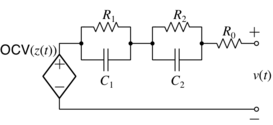
To use this kind of model, you need to provide values for $R_0$, the resistor-capacitor resistances, and the resistor-capacitor capacitances. You do this by setting <code>rcValues</code> to a vector having an odd number of elements. The first element is always $R_0$ in milliohms. The even-numbered elements are the resistor-capacitor resistances in milliohms. The remaining elements are the resistor-capacitor capacitances in kilofarads.

In [2]:
% GRADED FUNCTION (do not modify this line)

% function rcValues = tuneModel
%
% This function specifies the resistor and capacitor values that
% you choose to use for either an Rint model or a Thévenin model 
% (see lesson 2.1.3), or an "extended Thévenin model" having 
% additional parallel resistor-capacitor branches.
% 
% If you wish to create an Rint model, simply set rcValues equal
% to the value of R0 (in milliohms).
% If you wish to create a Thévenin model, define rcValues to be 
% a vector having three elements. The first element is R0 (in
% milliohms), the second element is R1 (in milliohms), and the 
% third element is C1 (in kilofarads).
% If you wish to create an extended Thévenin model having 
% additional resistor-capacitor branches, then define rcValues to
% be a vector where the first element is R0 in milliohms, the 
% even-index elements (rcValues(2:2:end)) are resistor values for
% the resistor-capacitor branches, in milliohms, and the remaining
% odd-index elements (rcValues(3:2:end)) are capacitor values for
% the resistor-capacitor branches, in kilofarads.
%
% It is possible to receive full credit for this assignment with
% a well-tuned Thévenin model, but it is also possible to get a 
% much better fit to the data using an extended Thévenin model.

function rcValues = tuneModel

  % BEGIN MODIFYING CODE AFTER THIS
  %rcValues = 21; % Rint Model - 14.3368 mV
  %rcValues = [15.6,13.1,64.7] % Thévenin Model - 4.31771 mV
  %rcValues = [15.55, 13.4, 88.6, 1.70, 74.5] % Thévenin model having two resistor-capacitor branches - 3.66018 mV
  rcValues = [15.45, 12.9, 91.9, 1.70, 80, 0.5, 100] % Thévenin model having three resistor-capacitor branches
                                                     % 3.55139 mV
  rcValues = rcValues(:); % output must be a column vector, not a row vector
end  

The following "wrapper" code loads a lab-test data file, runs the simulator, and plots results. Make sure you type < shift >< enter> in the <code>tuneModel</code> function notebook cell before executing the "wrapper code".  (Do not change this code.)

rcValues =

 Columns 1 through 6:

    15.45000    12.90000    91.90000     1.70000    80.00000     0.50000

 Column 7:

   100.00000

Your tuning values produced an RMS voltage-prediction error of 3.55139 mV
Your grade is calculated to be 10/10


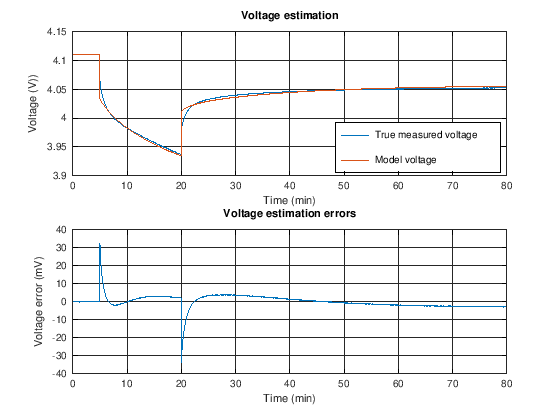

In [3]:
% Load data file to use for this capstone project
% - these data have the fields: time, current, voltage
% Also load a skeleton ESC model structure
% - has total capacity and OCV relationship
load readonly/pulseData.mat; % load data to use for this project
load readonly/pulseModel.mat; % load SOC/OCV relationships, capacity
T = 25;                            % Test temperature
deltaT = 1;                        % sampling period for data
Q = getParamESC('QParam',T,model); % total capacity of cell

tk = pulseData.time;    % testing time
ik = pulseData.current; % testing current
vk = pulseData.voltage; % testing voltage

% Get tuning values from user-modified function
rcValues = tuneModel;

% Simulate cell model using user-modified rcValues
R0 = rcValues(1)/1000; % convert milliohms to ohms
R = rcValues(2:2:end)/1000; % convert these also
C = rcValues(3:2:end)*1000; % convert kF to F
RCfact = exp(-deltaT./(R.*C));
    
% Simulate the dynamic states of the model
iRk = zeros(length(RCfact),1); % initial resistor currents
vCk = 0*pulseData.voltage; % initialize capacitor voltages
if ~isempty(RCfact)
  for k = 2:length(vCk)
    iRk = diag(RCfact)*iRk + (1-RCfact)*ik(k-1); % update resistor current
    vCk(k) = R'*iRk; % compute capacitor voltage
  end
end

% Simulate SOC state
z0 = SOCfromOCVtemp(pulseData.voltage(1),25,model); 
zk = z0-cumsum([0;ik(1:end-1)])*deltaT/(Q*3600); 

% Compute voltage estimate
vest = OCVfromSOCtemp(zk,25,model) - vCk - ik.*R0;

% Compare against measured voltage, compute RMSE in mV
rmse = 1000*sqrt(mean((vk - vest).^2));

% Plot some results 
subplot(2,1,1); plot(tk/60,vk,tk/60,vest); 
title('Voltage estimation'); grid on
xlabel('Time (min)'); ylabel('Voltage (V))'); 
legend('True measured voltage','Model voltage','location','southeast');

subplot(2,1,2); plot(tk/60,1000*(vk-vest)); 
title('Voltage estimation errors');
xlabel('Time (min)'); ylabel('Voltage error (mV)');
grid on

% Compute the prospective grade
gradeTable = [15 13 11.5 10 9 8 7 6 5 4.5];
ind = find(rmse<gradeTable,1,'last');
if isempty(ind)
  grade = 0;
else
  grade = ind;
end
fprintf('Your tuning values produced an RMS voltage-prediction error of %g mV\n',rmse);
fprintf('Your grade is calculated to be %d/10\n',grade);


When you are satisfied with your tuning, click on the "<b>Submit Assignment</b>" button, above.

The assignment will be graded out of a maximum of 10 points possible. Your grade will depend on the root-mean-squared voltage estimation error of your tuned model when compared against the laboratory data.
* If your code produces errors when executed, the grade is zero
* Otherwise, your grade can be found looking up the RMS voltage estimation error in the grading table given in the project description page and copied below (the value is also computed by this code, for easy reference).
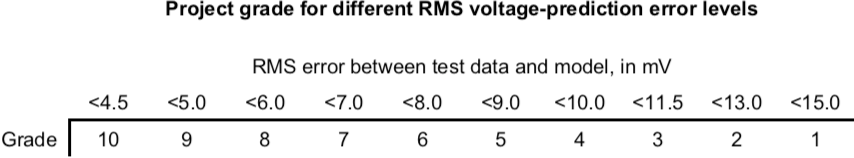
For a grade of 100%, you will need to achieve RMS voltage estimation error of less than 4.5 mV.

I believe that you will find that lesson 2.1.6 can provide a useful starting point for this exercise. However, you will also find that the method for giving "ballpark" model parameter values does not produce the "best" parameter values. You will still need to make some modifications to the initial values suggested by this method to get a good match between model predictions and measured voltage.

If you are curious, the best results that I have been able to obtain are:
* For an Rint model ($R_0$ only), 14.3 mV.
* For a Thévenin model ($R_0$, $R_1$, and $C_1$), 4.3 mV.
* For a Thévenin model having two resistor-capacitor branches ($R_0$, $R_1$, $R_2$, $C_1$, and $C_2$), 1.5 mV.
* My best result overall was for a Thévenin model having three resistor-capacitor branches and it gave an RMS error slightly less than 1 mV.

It took me quite a long time to find these good results! This is why I will be pleased if you achieve an RMS error of less than 4.5 mV.